<a href="https://colab.research.google.com/github/AbhishekRP2002/OCR-Guide/blob/main/Automatic_Number_Plate_Recognition_with_Easy_OCR_and_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this ,  Automatic Number Plate Recognition is implemented with Easy OCR and Open CV.
Easy OCR is a python based library with ready to use OCR models

The implementation of ANPR is divided into several small steps

- Install and Import Dependencies
- Reading an Image
- Apply Filter and Find Edges For Localization
- Find the Contours and Apply Mask
- Creating a Blank Mask:
- Drawing the Contours
- Use Easy OCR to Read Text
- Render Results: Overlay Results on the Original Image

In [2]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 8.1 MB/s 
     |████████████████████████████████| 619 kB 70.4 MB/s 
     |████████████████████████████████| 145 kB 60.4 MB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import the Required Libraries

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import imutils

Reading the image : The image will be used to test the designed ANPR System

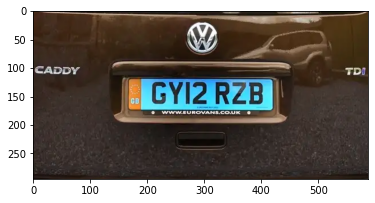

In [36]:
img = cv2.imread('/content/test.webp')
plt.imshow(img)

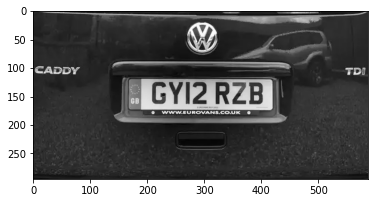

In [37]:
img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb , cv2.COLOR_RGB2GRAY)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## Apply Filter and Find Edges For Localization

- Filtering is applied to remove the noise from the image and edge detection enable us to find edges with in the image

In [38]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)

For edge Detection , we will use Canny Algorithm

In [39]:
edged = cv2.Canny(bfilter , 30 , 200)

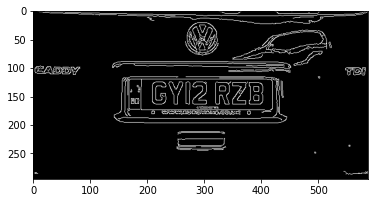

In [40]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Find the Contours and Apply Mask

- The last parameter cv2.CHAIN_APPROX_SIMPLE, gives us the simplified version of contours

In [42]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [43]:
contours = imutils.grab_contours(keypoints)

In [44]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10] #sorting the Top 10 contours

In [45]:
location = None
for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [46]:
mask = np.zeros(gray.shape, np.uint8) # Creating a Blank Mask

In [47]:
new_image = cv2.drawContours(mask, [location], 0, 255, -1) # Drawing the contours

The bitwise_and operator returns an array that corresponds to the resulting image from the merger of the given two images.

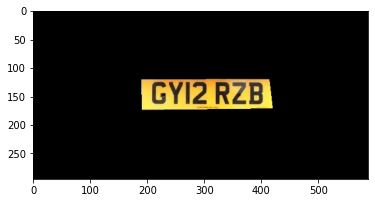

In [48]:
new_image = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In the next step, we will find all those section where the image isn’t black

To get the image which purely represent the segment which has the number plate

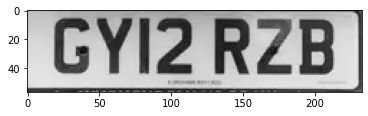

In [49]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
# Adding Buffer
cropped_image = gray[x1:x2+3, y1:y2+3]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## Use Easy OCR to Read Text

In [50]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[12, 0], [222, 0], [222, 54], [12, 54]], 'GYI2 RZB', 0.7442143004339655)]


In [54]:
print(result)

[([[12, 0], [222, 0], [222, 54], [12, 54]], 'GYI2 RZB', 0.7442143004339655)]


Render Results: Overlay Results on the Original Image

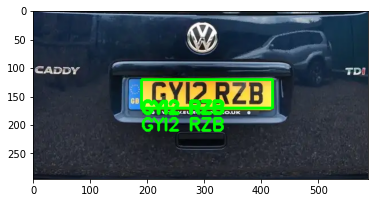

In [57]:
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+90), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 3)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))